#                               TITANIC CLASSIFICATION

Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

#               IMPORTING LIABRARIES AND LOADING THE DATASETS


In [185]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score


In [186]:
file_path="D:/faryal/datascience internship/week 1/titanic classification/titanic classification.csv"
titanic = pd.read_csv(file_path)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#        GETTING THE INFORMATION ABOUT OUR DATASET LIKE TOTAL NUMBER OF ROWS AND COLUMNS ,THEIR DATATYPES AND MEMORY USAGE

In [187]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#                         Shape of our dataset

In [188]:
print("Number of rows",titanic.shape[0])
print("Number of columns",titanic.shape[1])


Number of rows 891
Number of columns 12


#                       unique value of some columns

In [189]:
print("the unique value of column gender",titanic['Sex'].unique())

print("the unique value of column status",titanic['Survived'].unique())

print("the unique value of column parch",titanic['Parch'].unique())

print("the unique value of column # of siblings and spouses",titanic['SibSp'].unique())

print("the unique value of column Embarked",titanic['Embarked'].unique())



the unique value of column gender ['male' 'female']
the unique value of column status [0 1]
the unique value of column parch [0 1 2 5 3 4 6]
the unique value of column # of siblings and spouses [1 0 3 4 2 5 8]
the unique value of column Embarked ['S' 'C' 'Q' nan]


#                                  Data Preprocessing

# handling missing values

In [190]:
print("Is there any null or missing values ? ",titanic.isnull().sum().any())
print("percentage of null values in particular column",titanic.isnull().sum()/len(titanic)*100)

Is there any null or missing values ?  True
percentage of null values in particular column PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


  As cabin is holding a large amount of missing value it is better to drop Cabin Column handle other 2 columns Age ,Embarked

# drop the column

In [191]:
titanic.drop('Cabin',axis=1, inplace=True)
print("cabin column is droped now")

titanic.isna().sum()


cabin column is droped now


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

# Handle NULL values

In [192]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean()) 

In [193]:
#titanic['Embarked']=titanic['Embarked'].mean()
#titanic['Embarked']=titanic['Embarked'].fillna(value = "C" , inplace =True)
titanic['Embarked'].replace(np.nan, value = "C", inplace=True)

#           Hence no missing values left

In [194]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Converting Categorical Data into Numeric

In [195]:
genders = {"male":0, "female":1}
titanic["Sex"] = titanic["Sex"].map(genders)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [196]:
ports = {"S":0, "C":1, "Q":2}
titanic["Embarked"] = titanic["Embarked"].map(ports)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#                                    Exploratory Data Analysis

# Descriptive statistic about the data set

In [197]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.363636
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.636159
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Data types of each column

In [198]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

#  didn’t survive (549) and did (342).

In [199]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Data Visualization of column Survived , SibSp , Parch, Age ,Fare

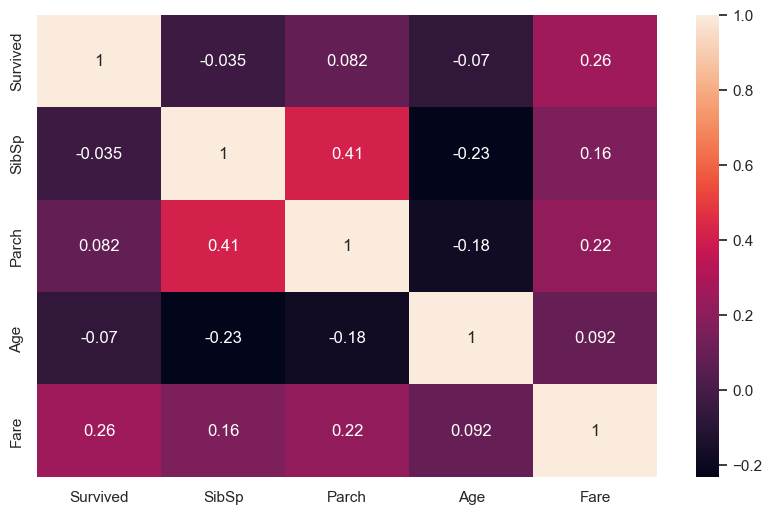

In [200]:
plt.figure(figsize=(10,6))

heatmap = sns.heatmap(titanic[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

# Visualize the count of survivors for the columns "sibsp"

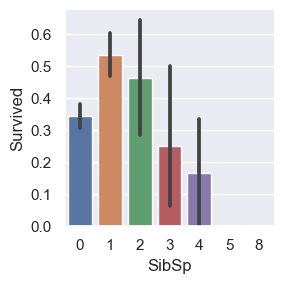

In [201]:
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = titanic, kind="bar", height = 3)

     Passengers having 1 or 2 siblings have good chances of survival More no. of siblings -> Fewer chances of survival

#  Age Column

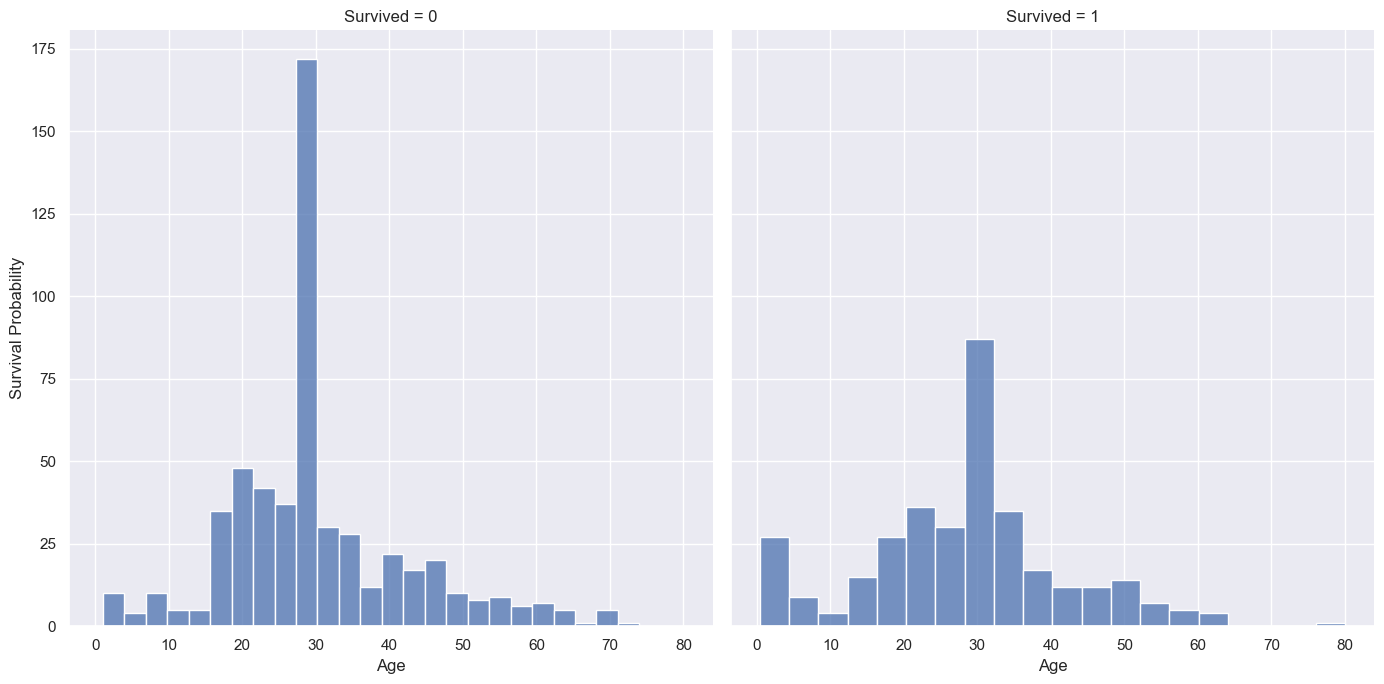

In [202]:
age = sns.FacetGrid(titanic, col="Survived", height = 7)
age = age.map(sns.histplot, "Age")
age = age.set_ylabels("Survival Probability")

We can see more age -> less chances of survival!

# GENDER COLOMN

<Axes: xlabel='Sex', ylabel='Survived'>

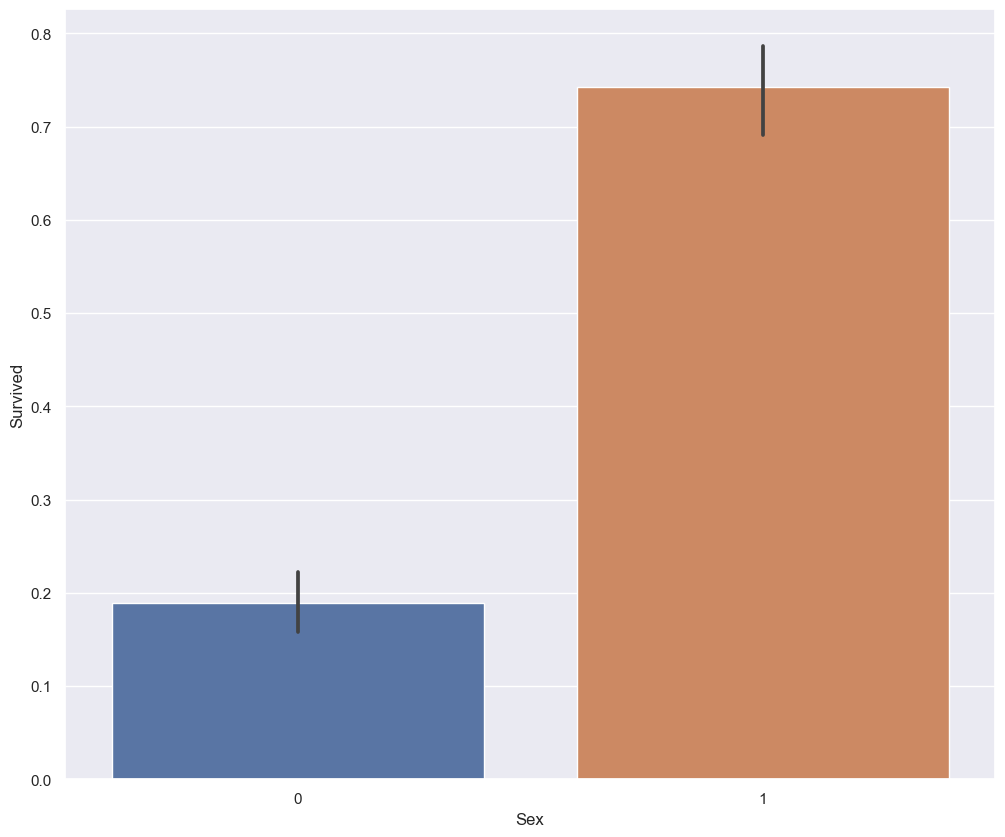

In [203]:
sns.barplot(x="Sex", y="Survived", data=titanic)

We can see from the above graph it’s quite obvious to say that man has less chances of survival over females.

# PCLASS COLOMN

Let us now see whether the class plays any role in survival probability or not.

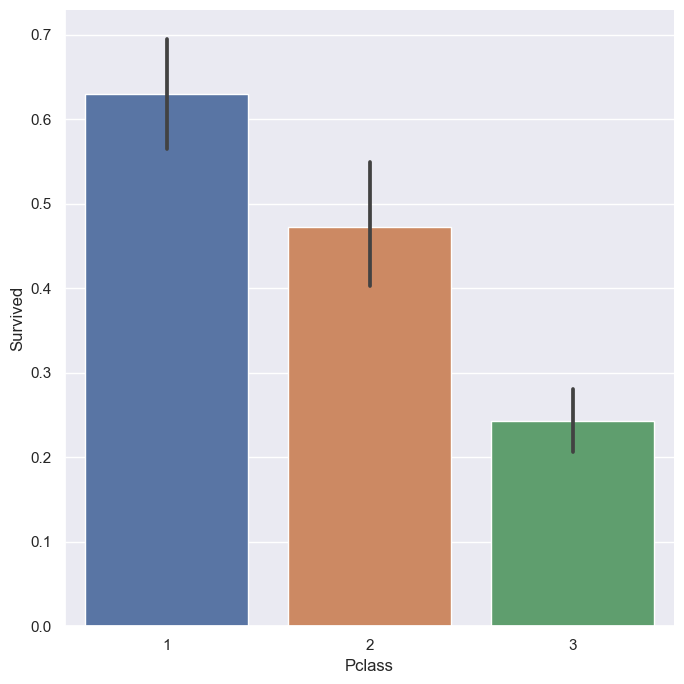

In [204]:
pclass = sns.catplot(x = "Pclass", y="Survived", data = titanic, kind="bar", height = 7)

So we can see a first class passenger has more chances of survival over 2nd and 3rd class passengers & Similarly the 2nd class passengers have more chances of survival over 3rd class passengers.

#                        BUILDING MACHINE LEARNING MODEL

In [205]:
df_train_x = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Target variable column
df_train_y = titanic['Survived']

# Train Test Splitting
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

Lastly, We are going to fit our model on 5 different classification algorithms namely RANDOM FOREST CLASSIFIER, LOGISTIC REGRESSION, K-NEIGHBOR CLASSIFIER, DECISSION TREE CLASSIFIER, and SUPPORT VECTOR MACHINE. And eventually will compare them.

# RANDOM FOREST

In [206]:
# Creating alias for Classifier
model1 = RandomForestClassifier()

# Fitting the model using training data
model1 = model1.fit(x_train, y_train)

# Predicting on test data
rfc_y_pred = model1.predict(x_test)

# Calculating Accuracy to compare all models
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 81.00558659217877


# LOGISTIC REGRESSION

In [207]:
model2 = LogisticRegression( max_iter=2000 )
model2 = model2.fit(x_train, y_train)
lr_y_pred = model2.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

accuracy= 79.88826815642457


# K-NEIGHBOR CLASSIFIER

In [208]:
model3 = KNeighborsClassifier(5)
model3 = model3.fit(x_train, y_train)
knc_y_pred = model3.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 70.39106145251397


# DECISSION TREE CLASSIFIER

In [209]:
model4 = tree.DecisionTreeClassifier()
model4 = model4.fit(x_train, y_train)
dtc_y_pred = model4.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 77.6536312849162


# SUPPORT VECTOR MACHINE

In [210]:
model5 = svm.SVC()
model5 = model5.fit(x_train, y_train)
svm_y_pred = model5.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)*100
print("accuracy=",svm_accuracy)

accuracy= 65.36312849162012


# ACCURACY SCORES OF All CLASSIFIERS

In [211]:
print("Accuracy of RANDOM FOREST CLASSIFIER =",rfc_accuracy)
print("Accuracy of LOGISTIC REGRESSION =",lr_accuracy)
print("Accuracy of K-NEIGHBOR CLASSIFIER =",knc_accuracy)
print("Accuracy of DECISION TREE CLASSIFIER = ",dtc_accuracy)
print("Accuracy of SUPPORT VECTOR MACHINE = ",svm_accuracy)

Accuracy of RANDOM FOREST CLASSIFIER = 81.00558659217877
Accuracy of LOGISTIC REGRESSION = 79.88826815642457
Accuracy of K-NEIGHBOR CLASSIFIER = 70.39106145251397
Accuracy of DECISION TREE CLASSIFIER =  77.6536312849162
Accuracy of SUPPORT VECTOR MACHINE =  65.36312849162012


Subsequently, we can now rank our evaluation of all the models to choose the best one for our problem. While Random Forest and Logistic Regression score almost the same.

# Conclusion:
That is it,i am done creating my program to predict if a passenger would survive the Titanic or not!
Random Forest and Logistic Regression are the best evaluator for Titanic Classification.

# Author

faryal shakeel
BS-Computer Science

internee at CodeAlpha 
DataScience project week1